# Student Name: Saeedreza Zouashkiani
# Student ID: 400206262

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch 
from torchvision import transforms
import torchvision
import seaborn as sns

In [2]:
# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Load fashion MNIST dataset from torchvision
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
# create dataloaders
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

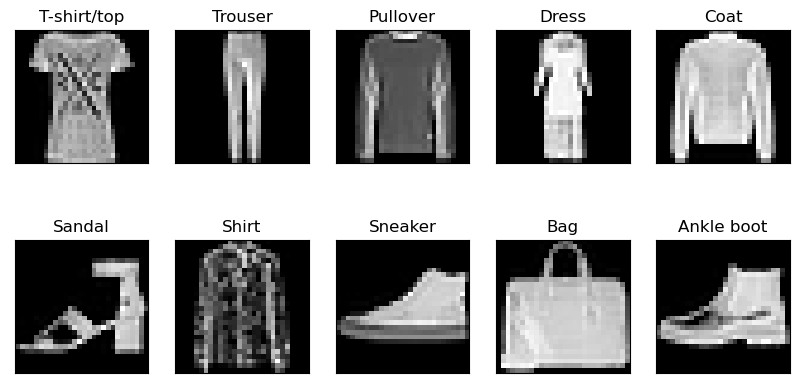

In [5]:
# plot one random image from each class 
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    indx = np.random.choice(np.where(np.array(trainset.targets) == i)[0])
    ax[i//5, i%5].imshow(trainset[indx][0].squeeze(), cmap='gray')
    ax[i//5, i%5].set_title(classes[i])
    ax[i//5, i%5].set_xticks([])
    ax[i//5, i%5].set_yticks([])
plt.show()

In [6]:
# define a cross entropy loss function from scratch
def cross_entropy(y_pred, y_true):
    return -torch.log(y_pred[range(y_pred.shape[0]), y_true]).mean()

# define a function to calculate accuracy
def accuracy(y_pred, y_true):
    return (y_pred.argmax(dim=1) == y_true).float().mean()

In [7]:
# create a linear layer class from scratch that takes in_features and out_features 
# as input and uses he initialization for weights and zero initialization for bias
class Linear:
    def __init__(self, in_features, out_features):
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.randn(out_features, in_features) * np.sqrt(2/in_features)
        self.weight.requires_grad = True
        self.bias = torch.zeros(out_features)
        self.bias.requires_grad = True

    def __call__(self, x):
        return x @ self.weight.t() + self.bias

# create a ReLU activation class from scratch

class ReLU:
    def __init__(self):
        pass

    def __call__(self, x):
        return x.clamp(min=0)

# create softmax activation class from scratch that
class Softmax:
    def __init__(self):
        pass

    def __call__(self, x):
        return torch.exp(x) / torch.exp(x).sum(dim=1, keepdim=True)

# create a sequential class from scratch that takes a list of layers as input
class Sequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [8]:
# define a model training function by updating the weights and bias using gradient descent
# The function also evaluates the model on the validation set and prints the loss and accuracy
def train(model, train_loader, test_loader, epochs, lr):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in range(epochs):
        train_loss = 0
        train_acc = 0
        for x, y in train_loader:
            x = x.view(x.shape[0], -1)
            y = y
            y_pred = model(x)
            loss = cross_entropy(y_pred, y)
            loss.backward()
            with torch.no_grad():
                for param in model.layers:
                    if hasattr(param, 'weight') and param.weight.requires_grad:
                        param.weight -= lr * param.weight.grad
                        param.bias -= lr * param.bias.grad
                        param.weight.grad.zero_()
                        param.bias.grad.zero_()
            train_loss += loss.item()
            train_acc += accuracy(y_pred, y).item()
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_loss = 0
        test_acc = 0
        for x, y in test_loader:
            x = x.view(x.shape[0], -1)
            y = y
            y_pred = model(x)
            loss = cross_entropy(y_pred, y)
            test_loss += loss.item()
            test_acc += accuracy(y_pred, y).item()
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.3f}, Test Loss: {test_loss:.3f}, Test Acc: {test_acc:.3f}')
    return train_losses, test_losses, train_accs, test_accs

In [24]:
# define the model
model = Sequential([Linear(784, 128), ReLU(), Linear(128, 64), ReLU(), Linear(64, 10), Softmax()])

In [25]:
# train the model for 10 epochs
train_losses, test_losses, train_accs, test_accs = train(model, train_loader, test_loader, 20, 0.01)

Epoch: 1/20, Train Loss: 0.664, Train Acc: 0.769, Test Loss: 0.541, Test Acc: 0.801
Epoch: 2/20, Train Loss: 0.461, Train Acc: 0.835, Test Loss: 0.483, Test Acc: 0.825
Epoch: 3/20, Train Loss: 0.420, Train Acc: 0.851, Test Loss: 0.462, Test Acc: 0.834
Epoch: 4/20, Train Loss: 0.396, Train Acc: 0.859, Test Loss: 0.426, Test Acc: 0.849
Epoch: 5/20, Train Loss: 0.378, Train Acc: 0.865, Test Loss: 0.413, Test Acc: 0.850
Epoch: 6/20, Train Loss: 0.364, Train Acc: 0.870, Test Loss: 0.414, Test Acc: 0.854
Epoch: 7/20, Train Loss: 0.353, Train Acc: 0.874, Test Loss: 0.399, Test Acc: 0.858
Epoch: 8/20, Train Loss: 0.342, Train Acc: 0.878, Test Loss: 0.402, Test Acc: 0.856
Epoch: 9/20, Train Loss: 0.333, Train Acc: 0.880, Test Loss: 0.388, Test Acc: 0.858
Epoch: 10/20, Train Loss: 0.325, Train Acc: 0.883, Test Loss: 0.388, Test Acc: 0.863
Epoch: 11/20, Train Loss: 0.318, Train Acc: 0.884, Test Loss: 0.375, Test Acc: 0.861
Epoch: 12/20, Train Loss: 0.312, Train Acc: 0.888, Test Loss: 0.371, Test 

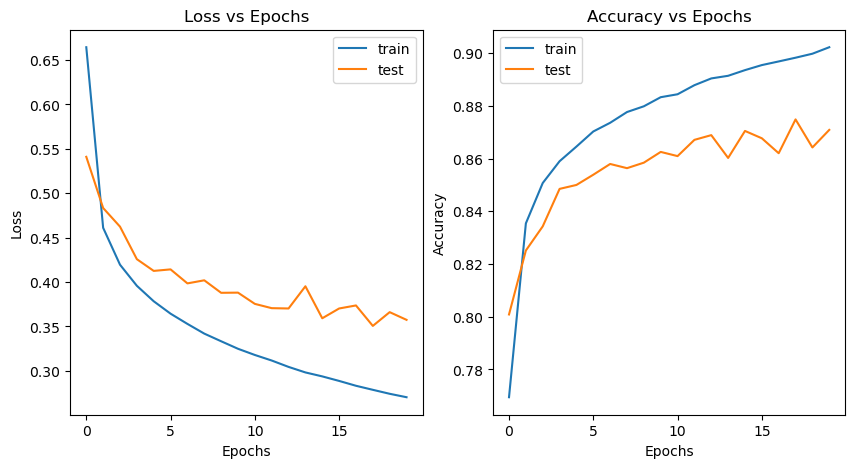

In [26]:
# plot the train and test losses
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(train_losses, label='train')
ax[0].plot(test_losses, label='test')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs Epochs')


# plot the train and test accuracies
ax[1].plot(train_accs, label='train')
ax[1].plot(test_accs, label='test')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy vs Epochs')
plt.show()

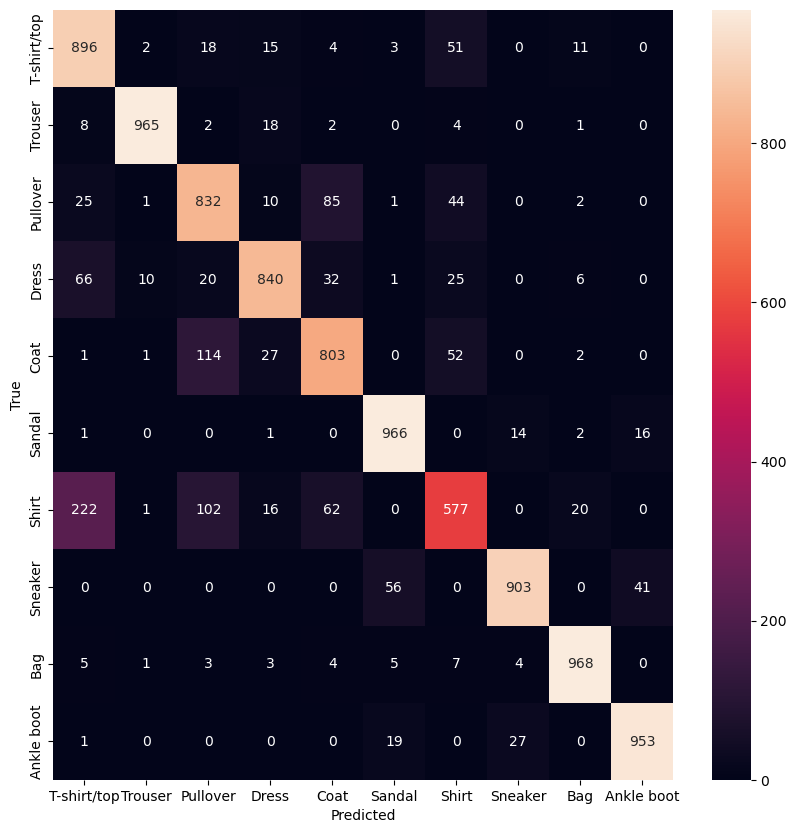

In [27]:
# define a function that computes the confusion matrix
def confusion_matrix(y_pred, y_true):
    cm = torch.zeros(len(classes), len(classes), dtype=torch.int32)
    for i in range(len(y_pred)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

# compute the confusion matrix
y_pred = []
y_true = []
for x, y in test_loader:
    x = x.view(x.shape[0], -1)
    y_pred.extend(model(x).argmax(dim=1).tolist())
    y_true.extend(y.tolist())
cm = confusion_matrix(y_pred, y_true)
# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

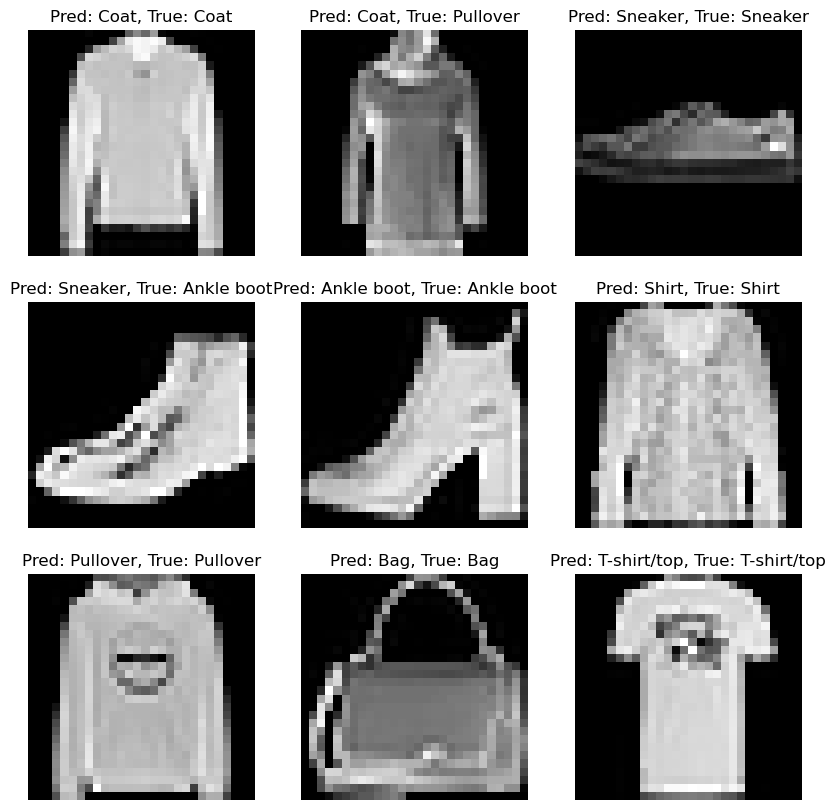

In [31]:
# test the model on 9 random images from test_loader and plot the images with their predicted and true labels 
# plot the images in a 3x3 grid
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        x, y = next(iter(test_loader))
        x = x.view(x.shape[0], -1)
        y_pred = model(x).argmax(dim=1)
        ax[i, j].imshow(x[0].view(28, 28), cmap='gray')
        ax[i, j].set_title(f'Pred: {classes[y_pred[0]]}, True: {classes[y[0]]}')
        ax[i, j].axis('off')
plt.show()